# Bank Marketing ML

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import altair as alt
print("Pandas version", pd.__version__)
#print("Altair version", alt.__version__)
from sklearn import __version__ as sklearn_version
print("Sklearn version", sklearn_version)

from time import time

np.random.seed(42)
alt.themes.enable("opaque")

%matplotlib inline

Pandas version 1.0.1
Sklearn version 0.22.1


NameError: name 'alt' is not defined

## Caso Práctico

Se utilizará un conjunto de datos relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable `y`).

Los datos se pueden encontrar en el siguiente [link](https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing), pero ya se encuentran descargados en la carpeta `data`.

Para realizar tal labor se procederá de la siguiente manera:

1. Lectura de datos
2. Análisis descriptivo
3. Visualizaciones
4. Pre-procesamiento
5. Modelo de Clasificación

## Lectura de Datos

In [7]:
bank = pd.read_csv(os.path.join("data", "bank.csv"), sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


El archivo `bank-names.txt` nos entrega toda la información detallada al conjunto de datos a utilizar. En particular nos interesa el punto 7, donde se definen las columnas.

In [8]:
%cat data/bank-names.txt

## Análisis Descriptivo

Lo primero es saber las columnas utilizadas, si es que poseen elementos nulos y el tipo de columna. Adicionalmente se puede obtener la cantidad de memoria RAM utilizada por este dataframe.

In [9]:
bank.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Luego sigue un análisis descriptivo de los datos, como ver medidas de dispersión (mínimo, máximo, promedio, etc.) para datos numéricos y medidas de frecuencia para datos categóricos.

In [10]:
bank.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521,NaN,NaN,NaN,41.1701,10.5762,19,33,39,49,87
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521,NaN,NaN,NaN,1422.66,3009.64,-3313,69,444,1480,71188
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521,NaN,NaN,NaN,15.9153,8.24767,1,9,16,21,31


In [11]:
# Tip: Usar fillna("") permite enmascarar los nans y solo observar los valores existentes. 

In [12]:
bank.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521,,,,41.1701,10.5762,19,33,39,49,87
job,4521,12,management,969,,,,,,,
marital,4521,3,married,2797,,,,,,,
education,4521,4,secondary,2306,,,,,,,
default,4521,2,no,4445,,,,,,,
balance,4521,,,,1422.66,3009.64,-3313,69,444,1480,71188
housing,4521,2,yes,2559,,,,,,,
loan,4521,2,no,3830,,,,,,,
contact,4521,3,cellular,2896,,,,,,,
day,4521,,,,15.9153,8.24767,1,9,16,21,31


Algunos análisis sobre nuestra variable de interés `y`

In [13]:
bank["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [14]:
bank["y"].value_counts().pipe(lambda s: s["yes"] / s.sum() * 100)

11.523999115239992

Solo hay alrededor de un 11% de datos positivos, en la literatura se suele decir que es un conjunto de datos __desbalanceado__.

Veamos como se distribuyen los datos numéricos respecto a la variable de interés

In [15]:
numeric_columns = bank.select_dtypes("number").columns.tolist()

alt.Chart(bank).mark_circle(opacity=0.3).encode(
    x=alt.X(alt.repeat("column"), type='quantitative'),
    y=alt.Y(alt.repeat("row"), type='quantitative'),
    color='y:N'
).properties(
    width=200,
    height=200
).repeat(
    row=numeric_columns,
    column=numeric_columns
)

NameError: name 'alt' is not defined

Ahora con los datos categóricos

In [16]:
object_columns = bank.drop(columns="y").select_dtypes("object").columns.tolist()

alt.Chart(bank).mark_bar().encode(
    x=alt.X(alt.repeat("row"), type='nominal'),
    y='count()',
    color='y:N'
).properties(
    width=400,
    height=300
).repeat(
    row=object_columns,
)


NameError: name 'alt' is not defined

## Pre-procesamiento

En esta sección se realizarán una serie de manipulación a los datos, con tal de implementar los modelos de clasificación en la siguien etapa. 

Los procesos típicos consideran definir la matriz de diseño `X`, el vector de respuesta `y`, dividir en conjunto de entrenamiento-test, realizar modificaciones a algunas columnas e incluso definir un _pipeline_ de transformaciones a realizar al conjunto de datos.

Se define la matriz de diseño y el vector de respuesta de forma usual, salvo que la variable `y` tendrá datos 0 y 1, en lugar de _no_ y _yes_, esto por practicidad a la hora de implementar las métricas de evaluación del desempeño.

In [17]:
X = bank.drop(columns="y")
y_label_dict = {"yes": 1, "no": 0}
y = bank["y"].map(y_label_dict)

In [18]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Se realiza la división de los sets de entrenamiento-test a razón de 80-20 y de manera estratificada dada la cantidad de datos que disponemos.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Revisemos que la división estratificada se hizo correctamente.

In [22]:
print(f"La razón entre valores 'no' y 'yes'  en el conjunto de entrenamiento es {y_train.value_counts().pipe(lambda s: s[0] / s[1]):.4f}")
print(f"Porcentaje de valores 'yes' en el conjunto de entrenamiento es {y_train.value_counts().pipe(lambda s: 100*s[1] / s.sum()):.4f}")
print(f"La razón entre valores 'no' y 'yes' en el conjunto de test es {y_test.value_counts().pipe(lambda s: s[0] / s[1]):.4f}")
print(f"Porcentaje de valores 'yes' en el conjunto de entrenamiento es {y_test.value_counts().pipe(lambda s: 100*s[1] / s.sum()):.4f}")

La razón entre valores 'no' y 'yes'  en el conjunto de entrenamiento es 7.6715
Porcentaje de valores 'yes' en el conjunto de entrenamiento es 11.5321
La razón entre valores 'no' y 'yes' en el conjunto de test es 7.7019
Porcentaje de valores 'yes' en el conjunto de entrenamiento es 11.4917


En cuenta al _workflow_, una buena práctica es realizar la definición de pasos a seguir en un clasificador utilizando `Pipeline`. En nuestro caso primero se definen una serie de transformaciones y luego el modelo clasificador a utilizar.

Entonces, primero se definen las transformaciones que se realizarán.

* Columnas numéricas se escalan.
* Columnas categóricas se codifican utilizando la técnica _One Hot_.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, object_columns)])

## Clasificación

Se crea el clasificador que considera la transformación anterior y además una regresión logística.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

Entrenamos los datos

In [27]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                      

Finalmente obtenemos el _score_

In [28]:
print(f"El score del modelo utilizando Regresión Logística es {clf.score(X_test, y_test):.3f}")

El score del modelo utilizando Regresión Logística es 0.893


Una manera gráfica de ver los resultados es utilizando la Matriz de Confusión

In [29]:
from sklearn.metrics import plot_confusion_matrix

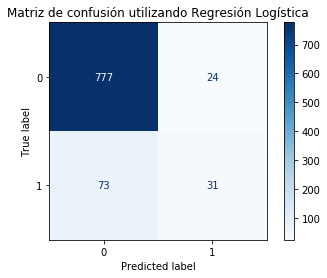

In [39]:
# Valores totales
cm = plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    values_format=".0f"
)
cm.ax_.set_title("Matriz de confusión utilizando Regresión Logística")
plt.show()

¿Cuantos casos de Falsos Positivos? ¿Cuantos casos de Falsos Negativos?

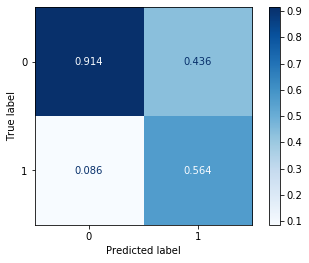

In [41]:
# Normalizar respecto a la predicción
plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    values_format=".3f",
    normalize="pred"
)
cm.ax_.set_title("Matriz de confusión normalizada (respecto a las columnas) utilizando Regresión Logística")
plt.show()

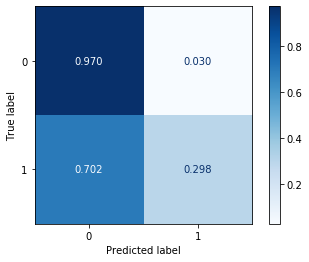

In [43]:
# Normalizar respecto a la predicción
plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    values_format=".3f",
    normalize="true"
)
cm.ax_.set_title("Matriz de confusión normalizada (respecto a las columnas) utilizando Regresión Logística")
plt.show()

Otra herramienta útil es el Reporte de Clasificación

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.56      0.30      0.39       104

    accuracy                           0.89       905
   macro avg       0.74      0.63      0.67       905
weighted avg       0.87      0.89      0.88       905



### Utilizando otros modelos

Probaremos distintos clasificadores para luego escoger el que mejor se ajusta a estos datos.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
classifiers_dict = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(3),
    "SVC": SVC(kernel="linear", C=0.025),
    "Decession Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  
}

In [38]:
for name, model in classifiers_dict.items():
    clf = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]
    )
    clf.fit(X_train, y_train)
    print(f"El score del modelo utilizando {name} es {clf.score(X_test, y_test):.3f}")

/Users/sebastiandres/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


El score del modelo utilizando Logistic Regression es 0.893
El score del modelo utilizando KNN es 0.886
El score del modelo utilizando SVC es 0.892
El score del modelo utilizando Decession Tree es 0.890
El score del modelo utilizando Random Forest es 0.885


### Hyper-parameters Tuning

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases de estimador. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor puntuación de validación cruzada.

Por ejemplo, utilizando un modelo _Support Vector Classifier_ realizaremos una búsqueda de los hiperparámetros `C` y `kernel`.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]
)

param_grid = {
    'classifier__C' : [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ('rbf', 'linear')
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring="recall",
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

In [41]:
print("Realizando grid search...")
print("\tpipeline:", [name for name, _ in pipeline.steps])
print("\tparameters:")
print(f"\t{param_grid}")
t0 = time()
grid_search.fit(X_train, y_train)
print(f"Realizado en {(time() - t0):0.3f} segundos\n")
print(f"Best score: {grid_search.best_score_:0.3f}")
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Realizando grid search...
	pipeline: ['preprocessor', 'classifier']
	parameters:
	{'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__kernel': ('rbf', 'linear')}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/sebastiandres/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.2s finished
/Users/sebastiandres/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Realizado en 23.628 segundos

Best score: 0.422
Best parameters set:
	classifier__C: 100
	classifier__kernel: rbf


Puedes ver el resumen de la ejecución anterior

In [42]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.25700474,  0.22373454,  0.24330425,  0.20557165,  0.27450466,
         0.37565462,  0.28291694,  0.99640338,  0.32522209, 13.41257477]),
 'std_fit_time': array([3.63576680e-03, 4.78261356e-03, 4.42328560e-03, 1.01890976e-03,
        2.42645170e-02, 2.08610499e-02, 1.02658315e-02, 2.28840158e-02,
        2.56856973e-02, 6.77790723e+00]),
 'mean_score_time': array([0.07036463, 0.05404512, 0.0720938 , 0.05331771, 0.07407999,
        0.05510449, 0.07340074, 0.03511596, 0.06492821, 0.03036102]),
 'std_score_time': array([0.00032725, 0.00058736, 0.00103276, 0.0002961 , 0.00219529,
        0.00116917, 0.00248556, 0.00072488, 0.0027299 , 0.00101793]),
 'param_classifier__C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__kernel': masked_array(data=['rbf', 'linear', 'r

Como también el mejor estimador obtenido

In [44]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                      

Si recuerdas, la métrica utilizada fue el _recall_, `scikit-learn` permite incluso calcular el `recall` para ambas etiquetas de clasificación.

In [45]:
grid_search.scorer_

make_scorer(recall_score, average=binary)

In [50]:
from sklearn.metrics import recall_score
recall_score(grid_search.best_estimator_.predict(X_train), y_train, average=None)

array([0.96841786, 0.96904025])

In [51]:
recall_score(grid_search.best_estimator_.predict(X_test), y_test, average=None)

array([0.92727273, 0.55      ])

In [55]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

In [59]:
y_test_pred.sum()/y_test_pred.shape[0]

0.08839779005524862

Podemos incluso volver a graficar la matriz de confusión.

In [52]:
cm = plot_confusion_matrix(
    grid_search,
    X_test,
    y_test,
    cmap=plt.cm.Blues
)

cm.ax_.set_title("Matriz de confusión utilizando GridSearchC")
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

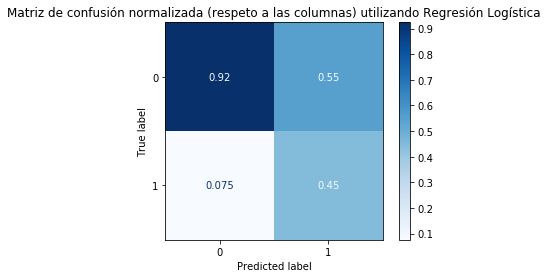

In [64]:
cm = plot_confusion_matrix(
    grid_search,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize="pred"
)
cm.ax_.set_title("Matriz de confusión normalizada (respeto a las columnas) utilizando GridSearchCV")
plt.show()

In [53]:
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       801
           1       0.55      0.42      0.48       104

    accuracy                           0.89       905
   macro avg       0.74      0.69      0.71       905
weighted avg       0.88      0.89      0.89       905



## Interpretación de Negocio

¿Cómo podemos interpretar los números anteriores?
* La matriz de confusión nos dice que, si se predice "0" (no deudor), en un 92% se ...
* La matriz de confusión nos dice que, si se predice "1" (deudor), en un 55% se ...
* La matriz de confusión nos dice que, si el valor verdaderro es "0" en un ..%
* La matriz de confusión nos dice que, si el valor verdaderro es "1" en un ..%


## Trabajos futuros

Algunas ideas interesantes para mejorar el modelo de clasificación pueden ser:

- Obtener más datos, con tal que el algoritmo pueda _aprender_ de mejor manera.
- Realizar _hyper-parameters tuning_ con más modelos, más parámetros e incluso con una grilla más fina (lo cual requiera mucho más tiempo poder de cómputo).